In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
data_path = "Fleet_Maintenance_Clustering_Dataset.csv"
data = pd.read_csv(data_path)

In [3]:
X = data.drop(columns=["Vehicle_ID"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

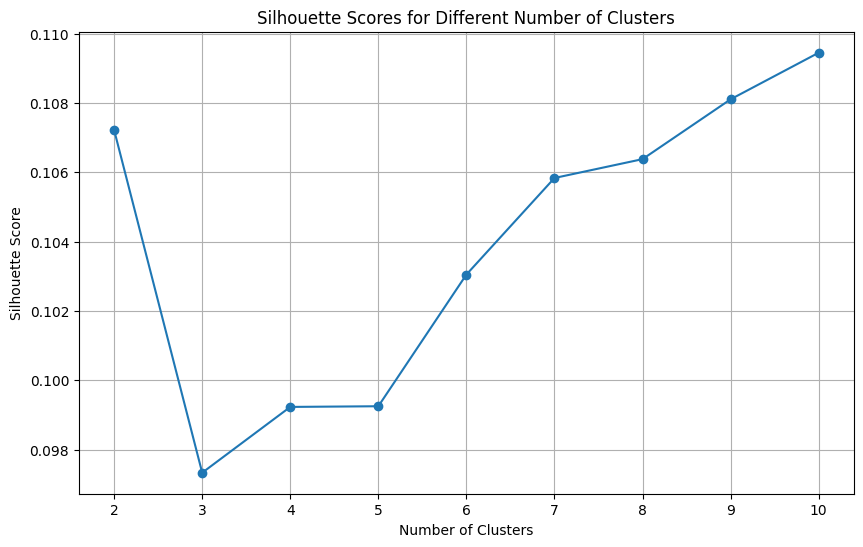

In [4]:
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

In [5]:
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [6]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
      Mileage_km  Engine_Hours  Fuel_Efficiency_km_l  Tire_Wear  Brake_Health  \
0  101074.990323   3578.190323             15.994087   0.294536      0.729490   
1   61554.039526   1470.264822              9.567182   0.690457      0.366607   
2  143522.685121   1557.065744             14.316819   0.273296      0.596104   
3  105857.393846   4024.916923             13.349475   0.684063      0.528825   
4   52033.847826   3094.031056              9.109641   0.525790      0.536753   
5  150266.990066   2483.576159              8.597568   0.353492      0.257609   
6   53842.540373   2148.012422             14.723631   0.317968      0.280653   
7  113491.902357   2495.481481             16.351855   0.701838      0.235296   
8  138030.171875   1561.090625             12.712621   0.740450      0.752119   
9   98453.369231   2914.500000              8.767682   0.310145      0.722695   

   Oil_Quality  Traffic_Density  
0     0.551167         0.714548  
1     0.346194         

In [7]:
data_path_clustered = "Fleet_Maintenance_Clustered_Dataset.csv"
data.to_csv(data_path_clustered, index=False)

print(f"Clustered dataset saved to {data_path_clustered}")


Clustered dataset saved to Fleet_Maintenance_Clustered_Dataset.csv
